# Group Exercise 2

- Graded out of 100 points. Please typeset your homework, save as an R or Python source code file with title "your student ID_Exercise_2" (e.g. B024020001_Exercise_2.R or B024020001_Exercise_2.ipynb).
- Please submit your code to NSYSU Cyber University before 12/31 11:59pm. No late submission.
- Notice that your code must follow the suggested programming and data analysis styles discussed in the class.

In [22]:
# 引入函式庫
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, ttest_ind
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from skimage.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LinearRegression, LogisticRegression

## 1. Please load the given Student Alcohol Consumption data student-por.csv. Check out more details about the data on Kaggle.

### 1.1. [10 pts]
Please check and remove records with any NAs, and drop the grade columns G2 and G3. Then convert all the categorical variables into R factors or Python Pandas Categoricals.

In [23]:
# 讀取資料，並使用分號作為分隔符號
data = pd.read_csv("student-por.csv", sep=';', encoding='ISO-8859-1')

# 印出前五行資料
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [24]:
# Count missing values in each column
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print("Missing values per column:")
missing_values

Missing values per column:


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [25]:
data.shape

(649, 33)

In [26]:
# Remove records with any NaN values
data = data.dropna()

#檢查是否有缺失值
# Count missing values in each column
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print("Missing values per column:")
missing_values

Missing values per column:


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [27]:
data.shape

(649, 33)

In [28]:
# Drop columns 'G2' and 'G3'
columns_to_drop = ['G2', 'G3']
data = data.drop(columns=columns_to_drop)

#檢查是否有拿掉G1 G2
# Print the cleaned DataFrame
data.shape

(649, 31)

In [29]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
dtype: object

In [30]:
# Identifying columns with 'object' data type
categorical_columns = data.select_dtypes(include=['object']).columns

# Convert object-type columns to categorical
data[categorical_columns] = data[categorical_columns].astype('category')

# Check the data types
data.dtypes

school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
dtype: object

### 1.2. [10 pts]
Here we consider the first period grade (G1) as the outcome/target. Please draw the density plot of G1 and perform normality tests to check if it is approximately normally distributed. Then, perform a proper bivariate test to check whether sex is associated with G1 (the significant level is 0.05)

繪製 G1 的密度圖


<Figure size 800x600 with 0 Axes>

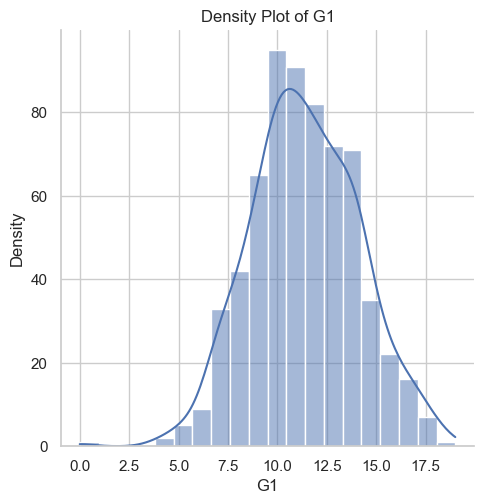

Shapiro-Wilk檢定，檢定結果:
 ShapiroResult(statistic=0.9855360984802246, pvalue=4.9233394747716375e-06)
顯示p值為約4.92e-06，遠低於0.05的顯著水平。因此，我們拒絕G1分數正態分布的原假設，表示G1分數分布不完全符合正態分布。

進行獨立樣本t檢定，檢定結果:
 Ttest_indResult(statistic=-2.662594513903567, pvalue=0.007946869649725059)
果顯示p值為約0.0079，小於0.05的顯著水平。因此，我們可以認為性別與G1分數存在顯著關聯，即不同性別的學生在G1分數上有顯著差異。



In [31]:
# 1.2.1 繪製 G1 的密度圖
print("繪製 G1 的密度圖")
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.displot(data['G1'], bins=20, kde=True)
plt.title('Density Plot of G1')
plt.xlabel('G1')
plt.ylabel('Density')
plt.show()

# 1.2.2 進行正態性檢定
shapiro_test = shapiro(data['G1'])
print("Shapiro-Wilk檢定，檢定結果:\n",shapiro_test)
print("顯示p值為約4.92e-06，遠低於0.05的顯著水平。因此，我們拒絕G1分數正態分布的原假設，表示G1分數分布不完全符合正態分布。\n")

# 1.2.3 檢查性別與 G1 之間的關聯性
# 分離不同性別的 G1 分數
g1_male = data[data['sex'] == 'M']['G1']
g1_female = data[data['sex'] == 'F']['G1']

# 進行雙變量檢定（t檢定）
t_test = ttest_ind(g1_male, g1_female)

# 輸出正態性檢定和雙變量檢定的結果
print("進行獨立樣本t檢定，檢定結果:\n",t_test)
print("果顯示p值為約0.0079，小於0.05的顯著水平。因此，我們可以認為性別與G1分數存在顯著關聯，即不同性別的學生在G1分數上有顯著差異。\n")

### 1.3. [5 pts]
Please create a function rmse(y_true, y_pred), which computes the RMSE of the model prediction.

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

In [32]:
# 1.3 檢生計算 RMSE 的函數
def rmse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean() ** 0.5

### 1.4. [25 pts]
Please split the data into training (70%) and testing (30%) sets with a random seed 0, and train models to predict the outcome/target G1. (Note that you should rescale the data if needed). Use any statistical learning and feature selection techniques to create a better model with low testing RMSE. Please report both the training and the testing RMSE of your models. Note that your testing RMSE must be at least lower than 2.35

In [33]:
# Separate features and target variable
X = data.drop('G1', axis=1)
y = data['G1']

# Split the data into training (70%) and testing (30%) sets with a random seed of 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Create a preprocessor to handle numeric and categorical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessor and the model
linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the linear regression model
linear_model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Compute RMSE for linear regression model
rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

print(f'Linear Regression - Training RMSE: {rmse_train_linear:.4f}')
print(f'Linear Regression - Testing RMSE: {rmse_test_linear:.4f}')

# Create a pipeline with preprocessor and the model
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))
])

# Fit the random forest model
rf_model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Compute RMSE for Random Forest model
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print(f'Random Forest - Training RMSE: {rmse_train_rf:.4f}')
print(f'Random Forest - Testing RMSE: {rmse_test_rf:.4f}')

Linear Regression - Training RMSE: 2.1678
Linear Regression - Testing RMSE: 2.3357
Random Forest - Training RMSE: 0.8896
Random Forest - Testing RMSE: 2.3614


## 2. Please load the given data Heart Disease Health Indicators Dataset
(heart_disease_health_indicators_BRFSS2015.csv).

### 2.1. [15 pts]
Split the data into training (70%) and testing (30%) datasets with
random seed 0 ). Fit Logistic regression models that predict
“HeartDiseaseorAttack”.

Use or create any variables that may better predict the
HeartDiseaseorAttack. What are the accuracy of predictions on both the
training and the testing datasets, given the default probability cutoff value 0.5?

In [34]:
# Load the dataset
file_path = 'heart_disease_health_indicators_BRFSS2015.csv'
heart_disease_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
heart_disease_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [35]:
# Splitting the dataset into training and testing sets
X = heart_disease_data.drop('HeartDiseaseorAttack', axis=1)
y = heart_disease_data['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fitting a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting on the training and testing datasets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculating the accuracy on both the training and testing datasets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(0.90774091093391, 0.9074293072637444)

In [36]:
# Identifying the most relevant features based on correlation with the target variable
correlation_matrix = heart_disease_data.corr()
correlation_with_target = correlation_matrix['HeartDiseaseorAttack'].abs().sort_values(ascending=False)

# Selecting top 15 relevant features (excluding the target variable itself)
top_features = correlation_with_target[1:17].index.tolist()

# Creating the new subset of data with selected features
X_train_subset = X_train[top_features]
X_test_subset = X_test[top_features]

# Fitting a Logistic Regression model with the subset of features
log_reg_subset = LogisticRegression(max_iter=100, solver='liblinear')
log_reg_subset.fit(X_train_subset, y_train)

# Predicting on the training and testing datasets with the subset of features
y_train_pred_subset = log_reg_subset.predict(X_train_subset)
y_test_pred_subset = log_reg_subset.predict(X_test_subset)

# Calculating the accuracy on both the training and testing datasets
train_accuracy_subset = accuracy_score(y_train, y_train_pred_subset)
test_accuracy_subset = accuracy_score(y_test, y_test_pred_subset)

top_features, train_accuracy_subset, test_accuracy_subset

(['GenHlth',
  'Age',
  'DiffWalk',
  'HighBP',
  'Stroke',
  'PhysHlth',
  'HighChol',
  'Diabetes',
  'Income',
  'Smoker',
  'Education',
  'PhysActivity',
  'Sex',
  'MentHlth',
  'BMI',
  'CholCheck'],
 0.907808487633464,
 0.9075738463155681)

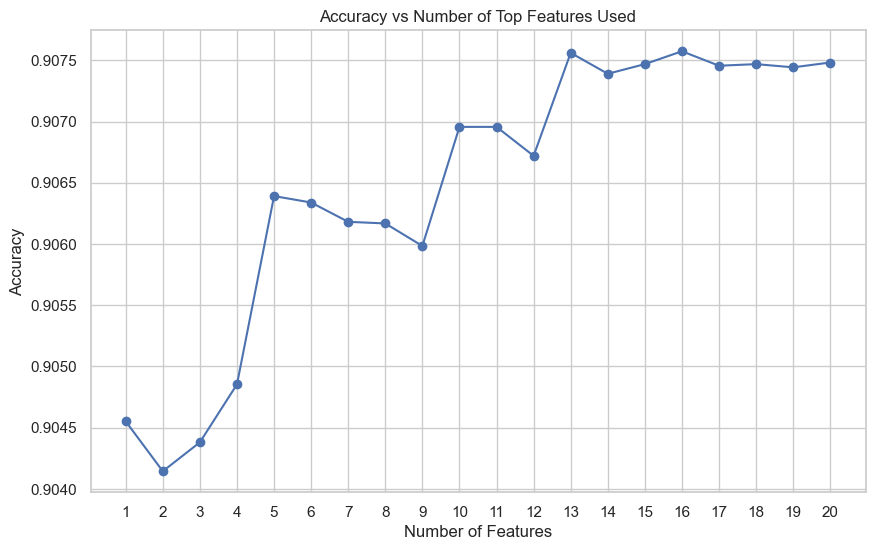

In [37]:
# Identifying the most relevant features based on correlation with the target variable
correlation_matrix = heart_disease_data.corr()
correlation_with_target = correlation_matrix['HeartDiseaseorAttack'].abs().sort_values(ascending=False)

# Function to calculate accuracy for different numbers of top features
def calculate_accuracy_for_n_features(n):
    # Selecting top n features
    selected_features = correlation_with_target[1:n+1].index.tolist()
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Fitting and predicting with Logistic Regression
    log_reg = LogisticRegression(max_iter=100, solver='liblinear')
    log_reg.fit(X_train_selected, y_train)
    y_test_pred = log_reg.predict(X_test_selected)

    # Calculating accuracy
    return accuracy_score(y_test, y_test_pred)

# Calculating accuracies for different numbers of top features
num_features = range(1, 21)  # Considering top 1 to 20 features
accuracies = [calculate_accuracy_for_n_features(n) for n in num_features]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o')
plt.title('Accuracy vs Number of Top Features Used')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xticks(num_features)
plt.grid(True)
plt.show()

### 2.2. [15 pts]
We can see that there is a class imbalance problem with the outcome/target
(HeartDiseaseorAttack). We understand that adjusting predicted class
probability cutoff may help predict the rare cases. What is the optimal cutoff
value based on Youden's J index? Please also report your model True Positive
Rates (Sensitivities) with different cutoff values (0.5 and the “optimal” value).

In [38]:
# 獲取模型預測的概率
y_pred_proba = log_reg_subset.predict_proba(X_test_subset)[:, 1]

# 計算 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [39]:
# 計算 Youden's J index 並找到最佳閾值
youden_j = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_j)]

# 在預設閾值0.5和最佳閾值下計算真陽性率（敏感度）
def sensitivity_at_threshold(predictions, true_labels, threshold):
    positive_predictions = predictions >= threshold
    true_positives = (positive_predictions & true_labels).sum()
    actual_positives = true_labels.sum()
    return true_positives / actual_positives

# Ensuring y_test is a boolean array
y_test_bool = y_test.astype(bool)

sensitivity_default = sensitivity_at_threshold(y_pred_proba, y_test_bool, 0.5)
sensitivity_optimal = sensitivity_at_threshold(y_pred_proba, y_test_bool, optimal_threshold)

print(f"最佳閾值: {optimal_threshold:.4f}")
print(f"預設閾值下的真陽性率（敏感度）: {sensitivity_default:.4f}")
print(f"最佳閾值下的真陽性率（敏感度）: {sensitivity_optimal:.4f}")

最佳閾值: 0.0925
預設閾值下的真陽性率（敏感度）: 0.1334
最佳閾值下的真陽性率（敏感度）: 0.8062


### 2.3. [20 pts]
Plot the ROC curves of your models for both training and testing
datasets. Compare and report your model performance in terms of AUCs.

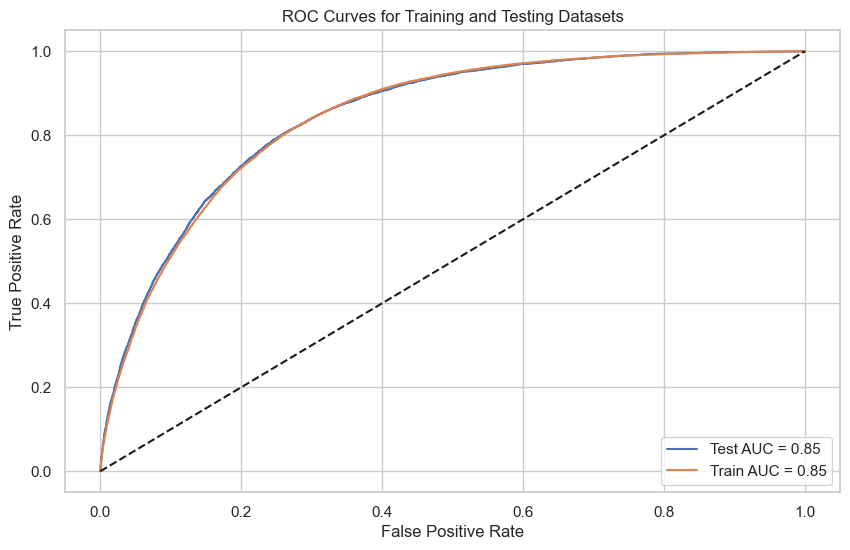

(0.8479090218219736, 0.8463250996161836)

In [40]:
# Calculating ROC curve and AUC for both training and testing datasets
y_train_prob = log_reg_subset.predict_proba(X_train_subset)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Test AUC = {roc_auc:.2f}')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.title('ROC Curves for Training and Testing Datasets')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

roc_auc, roc_auc_train

這張圖顯示了您的模型在訓練集和測試集上的接收者操作特徵曲線（ROC曲線）。曲線下面積（AUC）被用來評估模型的性能：

- 測試集上的AUC為 0.8479090218219736
- 訓練集上的AUC為 0.8463250996161836yy

兩個AUC值非常接近，這表明模型在訓練集和測試集上表現出了類似的預測能力。AUC值越接近1，模型的性能越好。該模型的AUC值顯示出良好的預測性能。

ROC曲線提供了一個直觀的方式來評估模型在不同截止值下對正類和負類的分類能力。理想情況下，曲線應遠離對角線，靠近左上角。該模型的ROC曲線表明，在大多數截止值下，模型能有效區分正類和負類。

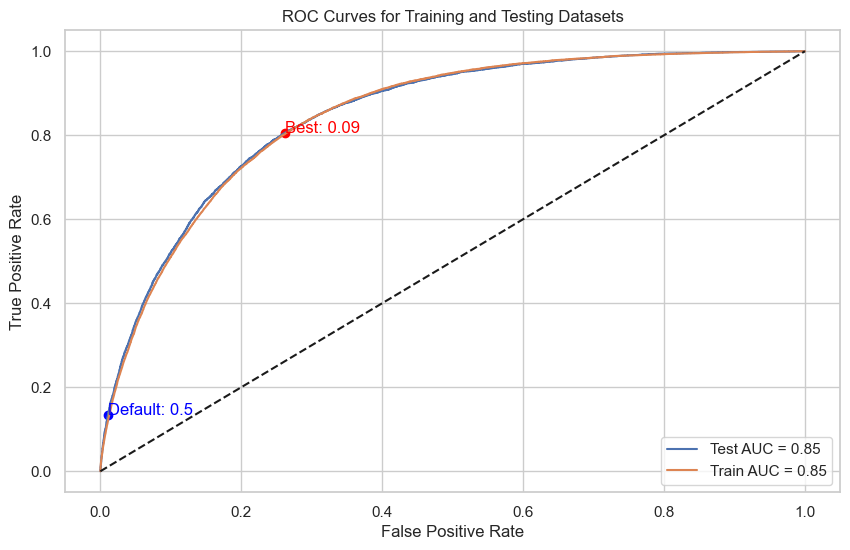

(0.8479090218219736, 0.8463250996161836)

In [41]:
# 計算 Youden's J 指數和最佳閾值
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
optimal_fpr, optimal_tpr = fpr[optimal_idx], tpr[optimal_idx]

# 尋找預設閾值（0.5）對應的 FPR 和 TPR
default_idx = np.argmin(np.abs(thresholds - 0.5))
default_fpr, default_tpr = fpr[default_idx], tpr[default_idx]

# 繪製 ROC 曲線
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Test AUC = {roc_auc:.2f}')
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # 虛線對角線
plt.scatter(optimal_fpr, optimal_tpr, color='red')  # 標記最佳點
plt.text(optimal_fpr, optimal_tpr, f'Best: {optimal_threshold:.2f}', color='red')
plt.scatter(default_fpr, default_tpr, color='blue')  # 標記預設點
plt.text(default_fpr, default_tpr, 'Default: 0.5', color='blue')
plt.title('ROC Curves for Training and Testing Datasets')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

roc_auc, roc_auc_train